In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
well_df = pd.read_csv('pop_plus_well.csv')

In [3]:
only_chrom_df = well_df.loc[well_df["chemical"] == "Chromium", :]


,county,Year,Population,well_id,results,chemical,date,units,qualifer,rl,latitude,longitude,well_type,source
160,Amador County,2010,37884,S6-MCAW-M02,0.026,Chromium,10/18/2016,UG/L,<,0.026,38.363528,-120.878472,MUNICIPAL,USGS
237,Butte County,2010,219945,ESAC-11,0.021,Chromium,7/13/2006,UG/L,<,0.021,39.332750,-121.816167,MUNICIPAL,USGS
238,Butte County,2010,219945,ESAC-11,0.023,Chromium,7/13/2006,UG/L,<,0.023,39.332750,-121.816167,MUNICIPAL,USGS
368,Colusa County,2010,21437,ESAC-31,0.021,Chromium,8/7/2006,UG/L,<,0.021,39.340583,-121.942778,MUNICIPAL,USGS
369,Colusa County,2010,21437,ESAC-31,0.023,Chromium,8/7/2006,UG/L,<,0.023,39.340583,-121.942778,MUNICIPAL,USGS


In [25]:
only_chrom_df = pd.get_dummies(only_chrom_df)


,Year,Population,results,rl,latitude,longitude,county_Amador County,county_Butte County,county_Colusa County,county_Del Norte County,...,units_MG/L,units_UG/L,units_UMHOS/CM,qualifer_<,qualifer_=,qualifer_ND,well_type_DOMESTIC,well_type_MUNICIPAL,source_GAMA,source_USGS
160,2010,37884,0.026,0.026,38.363528,-120.878472,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
237,2010,219945,0.021,0.021,39.332750,-121.816167,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
238,2010,219945,0.023,0.023,39.332750,-121.816167,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
368,2010,21437,0.021,0.021,39.340583,-121.942778,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
369,2010,21437,0.023,0.023,39.340583,-121.942778,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1


In [16]:
X = only_chrom_df[['Population','well_type_DOMESTIC','well_type_MUNICIPAL', 'latitude' ]]
y = only_chrom_df.rl.values.reshape(-1, 1)
print(X.shape, y.shape)

(1368, 4) (1368, 1)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [19]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

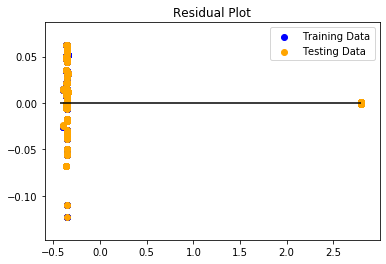

In [21]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.001133088017254661, R2: 0.998822841677829


In [26]:
only_bar_df = well_df.loc[well_df["chemical"] == "Barium", :]


,county,Year,Population,well_id,results,chemical,date,units,qualifer,rl,latitude,longitude,well_type,source
150,Amador County,2010,37884,S6-MCAW-M02,0.0060,Barium,10/18/2016,UG/L,<,0.0060,38.363528,-120.878472,MUNICIPAL,USGS
215,Butte County,2010,219945,ESAC-11,0.0090,Barium,7/13/2006,UG/L,<,0.0090,39.332750,-121.816167,MUNICIPAL,USGS
346,Colusa County,2010,21437,ESAC-31,0.0090,Barium,8/7/2006,UG/L,<,0.0090,39.340583,-121.942778,MUNICIPAL,USGS
470,Colusa County,2010,21437,ESAC-31,0.0076,Barium,10/5/2016,UG/L,<,0.0076,39.340583,-121.942778,MUNICIPAL,USGS
553,Colusa County,2010,21437,RICE-18,0.0061,Barium,8/16/2006,UG/L,<,0.0061,39.470797,-122.136864,MUNICIPAL,USGS


In [27]:
only_bar_df = pd.get_dummies(only_bar_df)


,Year,Population,results,rl,latitude,longitude,county_Amador County,county_Butte County,county_Colusa County,county_Del Norte County,...,units_MG/L,units_UG/L,units_UMHOS/CM,qualifer_<,qualifer_=,qualifer_ND,well_type_DOMESTIC,well_type_MUNICIPAL,source_GAMA,source_USGS
160,2010,37884,0.026,0.026,38.363528,-120.878472,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
237,2010,219945,0.021,0.021,39.332750,-121.816167,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
238,2010,219945,0.023,0.023,39.332750,-121.816167,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
368,2010,21437,0.021,0.021,39.340583,-121.942778,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
369,2010,21437,0.023,0.023,39.340583,-121.942778,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1


In [28]:
X = only_bar_df[['Population','well_type_DOMESTIC','well_type_MUNICIPAL', 'latitude' ]]
y = only_bar_df.rl.values.reshape(-1, 1)
print(X.shape, y.shape)

(1368, 4) (1368, 1)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=97)

In [30]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [31]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

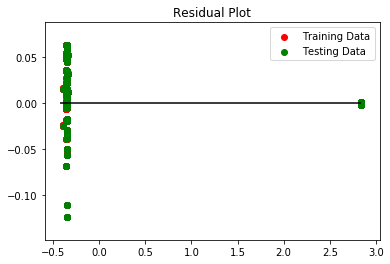

In [33]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="red", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="green", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.001242674447096496, R2: 0.9988225041668967


In [35]:
only_lead_df = well_df.loc[well_df["chemical"] == "Lead", :]


,county,Year,Population,well_id,results,chemical,date,units,qualifer,rl,latitude,longitude,well_type,source
179,Amador County,2010,37884,S6-MCAW-M02,0.060,Lead,10/18/2016,UG/L,<,0.060,38.363528,-120.878472,MUNICIPAL,USGS
285,Butte County,2010,219945,ESAC-11,0.050,Lead,7/13/2006,UG/L,<,0.050,39.332750,-121.816167,MUNICIPAL,USGS
416,Colusa County,2010,21437,ESAC-31,0.050,Lead,8/7/2006,UG/L,<,0.050,39.340583,-121.942778,MUNICIPAL,USGS
514,Colusa County,2010,21437,ESAC-31,0.036,Lead,10/5/2016,UG/L,<,0.036,39.340583,-121.942778,MUNICIPAL,USGS
613,Colusa County,2010,21437,RICE-18,0.041,Lead,8/16/2006,UG/L,<,0.041,39.470797,-122.136864,MUNICIPAL,USGS


In [36]:
only_lead_df = pd.get_dummies(only_lead_df)


,Year,Population,results,rl,latitude,longitude,county_Amador County,county_Butte County,county_Colusa County,county_Del Norte County,...,date_9/21/2016,units_Count,units_UG/L,qualifer_<,qualifer_=,qualifer_ND,well_type_DOMESTIC,well_type_MUNICIPAL,source_GAMA,source_USGS
179,2010,37884,0.060,0.060,38.363528,-120.878472,1,0,0,0,...,0,0,1,1,0,0,0,1,0,1
285,2010,219945,0.050,0.050,39.332750,-121.816167,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1
416,2010,21437,0.050,0.050,39.340583,-121.942778,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1
514,2010,21437,0.036,0.036,39.340583,-121.942778,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1
613,2010,21437,0.041,0.041,39.470797,-122.136864,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1


In [37]:
X = only_lead_df[['Population','well_type_DOMESTIC','well_type_MUNICIPAL', 'latitude' ]]
y = only_lead_df.rl.values.reshape(-1, 1)
print(X.shape, y.shape)

(1089, 4) (1089, 1)


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [39]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [40]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

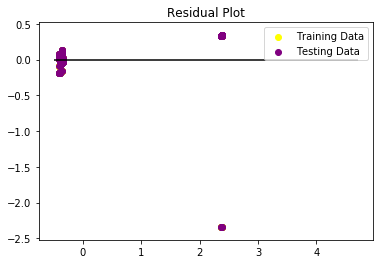

In [42]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="yellow", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="purple", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.09965518950766718, R2: 0.9022673422637779
